In [1]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load your CSV file into a DataFrame
df = pd.read_csv('scores.csv')




In [3]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [4]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [5]:
df.dropna(inplace=True)  

In [6]:
df.isnull().sum()

number       0
days         0
gender       0
age          0
afftype      0
melanch      0
inpatient    0
edu          0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [7]:
# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = desired_dataset_size // len(df) + 1

# # Repeat the existing data
# augmented_data = pd.concat([df] * repeats_needed, ignore_index=True)

# # If the repeated data exceeds the desired size, truncate the excess
# augmented_data = augmented_data.iloc[:desired_dataset_size]

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

In [8]:
df.head(30)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


In [9]:
label_encode=LabelEncoder()

In [10]:
labels=label_encode.fit_transform(df['age'])

In [11]:
print(labels)

[2 3 4 0 5 2 4 4 3 2 7 6 4 5 3 5 1 2 8 1]


In [12]:
df['age']=labels

In [13]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,2,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,3,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,4,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,0,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,5,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,2,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
9,condition_10,9,2,4,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
10,condition_11,14,1,4,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,3,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,2,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


# Label Encoding
{0:25-29,1:30-34,2:35-39,3:40-44,4:45-49,5:50-54,6:55-59,7:60-64,8:65-69}

In [14]:
#df.duplicated().sum()

In [15]:
#df.drop_duplicates(inplace=True)

In [16]:
df.shape

(20, 12)

In [17]:
df.drop(['number','days','edu'],axis=1,inplace=True)

In [18]:
df.head()

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,2,2.0,2.0,2.0,1.0,2.0,19.0,19.0
1,2,3,1.0,2.0,2.0,2.0,2.0,24.0,11.0
2,1,4,2.0,2.0,2.0,2.0,2.0,24.0,25.0
3,2,0,2.0,2.0,2.0,1.0,1.0,20.0,16.0
4,2,5,2.0,2.0,2.0,2.0,2.0,26.0,26.0


In [19]:
# augmented_dataset.csv

In [20]:
# # import pandas as pd

# # # Load your CSV file into a DataFrame
# # #df = pd.read_csv('scores.csv')

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = (desired_dataset_size // len(df)) + 1

# # Repeat the existing data
# augmented_data = pd.concat([df] * repeats_needed, ignore_index=True)

# # If the repeated data exceeds the desired size, truncate the excess using head
# augmented_data_truncated = augmented_data.head(desired_dataset_size)

# # Save the augmented dataset to a new CSV file
# augmented_data_truncated.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data_truncated.head())

# # View the shape of the new dataset
# print(augmented_data_truncated.shape)


In [21]:
#  augmented_data_truncated.tail(300)

In [22]:
# augmented_data_truncated.duplicated().sum()

In [23]:
# augmented_data_truncated.drop_duplicates(inplace=True)

In [24]:
# augmented_data_truncated.duplicated().sum()

In [25]:
#augmented_data_truncated.shape

In [26]:
# # import pandas as pd

# # # Load your CSV file into a DataFrame
# # #df = pd.read_csv('scores.csv')

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many times to repeat the existing data to reach the desired size
# repeats_needed = (desired_dataset_size // len(df)) + 1

# # Repeat the existing data
# augmented_data = pd.concat([augmented_data_truncated] * repeats_needed, ignore_index=True)
# # Drop duplicate rows
# augmented_data = augmented_data.drop_duplicates()

# # If the repeated data exceeds the desired size, truncate the excess using head
# augmented_data_truncateds = augmented_data.head(desired_dataset_size)

# # Save the augmented dataset to a new CSV file
# augmented_data_truncateds.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data_truncateds.head())

# # View the shape of the new dataset
# print(augmented_data_truncateds.shape)

In [27]:
# augmented_data_truncateds.duplicated().sum()

In [28]:
# augmented_data_truncateds.shape

In [29]:
# import pandas as pd
# from sklearn.utils import resample

# # Load your CSV file into a DataFrame
# #dfs = pd.read_csv('scores.csv')

# # Drop rows with null values
# df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df)
# # # Drop duplicate rows
# # augmented_data = augmented_data.drop_duplicates()

# # Perform data augmentation or resampling to generate additional rows
# # For example, you can use techniques like oversampling, undersampling, or SMOTE
# # Here's an example using resampling to increase the dataset size
# resampled_data = resample(df, n_samples=additional_rows_needed)


# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df, resampled_data], ignore_index=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)


In [30]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.utils import resample

# # Load your CSV file into a DataFrame
# #df = pd.read_csv('your_dataset.csv')

# # Drop rows with null values
# #df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 1000

# # Shuffle the DataFrame to ensure randomness
# df_shuffled = shuffle(df)

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df_shuffled)

# # Perform resampling to generate additional rows
# # Set replace=True to allow sampling with replacement
# resampled_data = resample(df_shuffled, n_samples=additional_rows_needed, replace=True)

# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df_shuffled, resampled_data], ignore_index=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)
# print(augmented_data.duplicated().sum())


In [31]:
# augmented_data.head(400)



In [32]:
# augmented_data.duplicated().sum()

In [33]:
# augmented_data.tail(400)

In [34]:
#augmented_data.drop(['number','days','edu'],axis=1,inplace=True)

In [35]:
#augmented_data.duplicated().sum()

In [36]:

#augmented_data.drop_duplicates(inplace=True)

In [37]:
#augmented_data.duplicated().sum()

In [38]:
#augmented_data.shape

In [39]:
# import pandas as pd
# from sklearn.utils import shuffle
# from sklearn.utils import resample
# from imblearn.over_sampling import SMOTE

# # Load your CSV file into a DataFrame
# df = pd.read_csv('scores.csv')

# # Drop rows with null values
# df.dropna(inplace=True)

# # Number of rows you want to add to your dataset
# desired_dataset_size = 100

# # Shuffle the DataFrame to ensure randomness
# df_shuffled = shuffle(df)

# # Determine how many additional rows to generate
# additional_rows_needed = desired_dataset_size - len(df_shuffled)

# # Perform resampling to generate additional rows
# # Set replace=True to allow sampling with replacement
# # You may need to adjust the sampling strategy and parameters
# #smote = SMOTE(sampling_strategy='auto', random_state=42)
# resampled_data = resample(df_shuffled, n_samples=additional_rows_needed, replace=True, random_state=42)

# # Concatenate the original data with the resampled data
# augmented_data = pd.concat([df_shuffled, resampled_data], ignore_index=True)

# # Drop duplicates
# #augmented_data.drop_duplicates(inplace=True)

# # Save the augmented dataset to a new CSV file
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # View the first few rows of the new dataset
# print(augmented_data.head())

# # View the shape of the new dataset
# print(augmented_data.shape)




In [40]:
import pandas as pd
import numpy as np

# Load your CSV file into a DataFrame
#df = pd.read_csv('scores.csv')

# Drop rows with null values
df.dropna(inplace=True)

# Number of rows you want to add to your dataset
desired_dataset_size =800

# Initialize empty DataFrame for augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Perform crossover to generate additional rows
for _ in range(desired_dataset_size):
    # Select two random samples from the dataset
    sample1 = df.sample(n=1).iloc[0]
    sample2 = df.sample(n=1).iloc[0]
    
    # Perform crossover by randomly selecting features from each parent
    new_sample = pd.Series([
        sample1[col] if np.random.rand() < 0.5 else sample2[col] for col in df.columns],
        index=df.columns
    )
    
    # Add the new sample to the augmented data
    augmented_data = pd.concat([augmented_data, new_sample.to_frame().T], ignore_index=True)

# Save the augmented dataset to a new CSV file
augmented_data.to_csv('augmented_dataset.csv', index=False)

# View the first few rows of the new dataset
print(augmented_data.head())

# View the shape of the new dataset
print(augmented_data.shape)


   gender  age  afftype  melanch  inpatient  marriage  work  madrs1  madrs2
0     2.0  6.0      2.0      2.0        2.0       1.0   2.0    14.0    18.0
1     1.0  4.0      2.0      2.0        2.0       1.0   2.0    24.0    24.0
2     1.0  7.0      1.0      2.0        2.0       1.0   2.0    28.0    19.0
3     2.0  4.0      2.0      2.0        2.0       2.0   2.0    26.0    21.0
4     2.0  3.0      2.0      2.0        2.0       2.0   2.0    26.0    21.0
(800, 9)


In [47]:
augmented_data.duplicated().sum()

0

In [48]:
augmented_data.drop_duplicates(inplace=True)

In [49]:
augmented_data.duplicated().sum()

0

In [50]:
augmented_data.shape

(585, 9)

In [51]:
augmented_data.head(100)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2.0,6.0,2.0,2.0,2.0,1.0,2.0,14.0,18.0
1,1.0,4.0,2.0,2.0,2.0,1.0,2.0,24.0,24.0
2,1.0,7.0,1.0,2.0,2.0,1.0,2.0,28.0,19.0
3,2.0,4.0,2.0,2.0,2.0,2.0,2.0,26.0,21.0
4,2.0,3.0,2.0,2.0,2.0,2.0,2.0,26.0,21.0
...,...,...,...,...,...,...,...,...,...
100,1.0,7.0,1.0,2.0,2.0,2.0,2.0,28.0,21.0
102,1.0,8.0,2.0,2.0,2.0,2.0,2.0,29.0,21.0
103,1.0,8.0,2.0,2.0,2.0,2.0,2.0,29.0,28.0
104,2.0,5.0,2.0,2.0,2.0,1.0,2.0,26.0,26.0


In [52]:
kk=augmented_data

In [53]:
kk.head(100)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2.0,6.0,2.0,2.0,2.0,1.0,2.0,14.0,18.0
1,1.0,4.0,2.0,2.0,2.0,1.0,2.0,24.0,24.0
2,1.0,7.0,1.0,2.0,2.0,1.0,2.0,28.0,19.0
3,2.0,4.0,2.0,2.0,2.0,2.0,2.0,26.0,21.0
4,2.0,3.0,2.0,2.0,2.0,2.0,2.0,26.0,21.0
...,...,...,...,...,...,...,...,...,...
100,1.0,7.0,1.0,2.0,2.0,2.0,2.0,28.0,21.0
102,1.0,8.0,2.0,2.0,2.0,2.0,2.0,29.0,21.0
103,1.0,8.0,2.0,2.0,2.0,2.0,2.0,29.0,28.0
104,2.0,5.0,2.0,2.0,2.0,1.0,2.0,26.0,26.0


In [69]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
kk.head(600)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,6,2,2,2,1,2,14,18
1,1,4,2,2,2,1,2,24,24
2,1,7,1,2,2,1,2,28,19
3,2,4,2,2,2,2,2,26,21
4,2,3,2,2,2,2,2,26,21
5,2,3,2,2,2,1,2,18,15
6,2,3,3,2,1,2,2,26,21
7,2,3,2,2,2,2,2,18,15
8,1,1,2,2,2,2,2,29,25
9,2,2,2,2,2,2,2,19,19


In [70]:
kk['madrs1']=kk['madrs1'].astype('int').astype('category')
kk['madrs2']=kk['madrs2'].astype('int').astype('category')
kk['gender']=kk['gender'].astype('int').astype('category')
kk['age']=kk['age'].astype('int').astype('category')
kk['afftype']=kk['afftype'].astype('int').astype('category')
kk['melanch']=kk['melanch'].astype('int').astype('category')
kk['inpatient']=kk['inpatient'].astype('int').astype('category')
kk['marriage']=kk['marriage'].astype('int').astype('category')
kk['work']=kk['work'].astype('int').astype('category')


In [71]:
kk.head(100)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,6,2,2,2,1,2,14,18
1,1,4,2,2,2,1,2,24,24
2,1,7,1,2,2,1,2,28,19
3,2,4,2,2,2,2,2,26,21
4,2,3,2,2,2,2,2,26,21
5,2,3,2,2,2,1,2,18,15
6,2,3,3,2,1,2,2,26,21
7,2,3,2,2,2,2,2,18,15
8,1,1,2,2,2,2,2,29,25
9,2,2,2,2,2,2,2,19,19


In [72]:
kk.reset_index(inplace=True)

In [73]:
kk.tail(100)

,index,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
485,630,1,8,2,2,1,2,2,24,28
486,631,2,0,2,2,2,1,1,20,15
487,633,2,0,2,1,1,1,2,20,25
488,634,2,6,1,2,2,1,1,25,21
489,636,2,4,2,2,2,2,2,18,15
490,637,1,4,2,2,2,1,2,17,15
491,639,1,1,1,2,2,2,2,29,13
492,641,2,4,2,2,2,1,2,24,26
493,642,2,1,2,2,1,1,2,27,21
494,643,2,2,2,2,2,1,2,24,19


In [74]:
kk.reset_index(drop=True,inplace=True)

In [75]:
kk.duplicated().sum()

0

In [76]:
df.isnull().sum()

gender       0
age          0
afftype      0
melanch      0
inpatient    0
marriage     0
work         0
madrs1       0
madrs2       0
dtype: int64

In [77]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      585 non-null    int64   
 1   gender     585 non-null    category
 2   age        585 non-null    category
 3   afftype    585 non-null    category
 4   melanch    585 non-null    category
 5   inpatient  585 non-null    category
 6   marriage   585 non-null    category
 7   work       585 non-null    category
 8   madrs1     585 non-null    category
 9   madrs2     585 non-null    category
dtypes: category(9), int64(1)
memory usage: 12.0 KB


In [78]:
kk.describe()

,index
count,585.000000
mean,362.827350
std,232.046669
min,0.000000
25%,155.000000
50%,345.000000
75%,571.000000
max,798.000000


In [79]:
kk.shape

(585, 10)

In [81]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
kk.head(600)
#kk.head(100)

,index,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,0,2,6,2,2,2,1,2,14,18
1,1,1,4,2,2,2,1,2,24,24
2,2,1,7,1,2,2,1,2,28,19
3,3,2,4,2,2,2,2,2,26,21
4,4,2,3,2,2,2,2,2,26,21
5,5,2,3,2,2,2,1,2,18,15
6,6,2,3,3,2,1,2,2,26,21
7,7,2,3,2,2,2,2,2,18,15
8,8,1,1,2,2,2,2,2,29,25
9,9,2,2,2,2,2,2,2,19,19


In [82]:
kk.drop(columns=['index'],inplace=True)

In [83]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
kk.head(600)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,6,2,2,2,1,2,14,18
1,1,4,2,2,2,1,2,24,24
2,1,7,1,2,2,1,2,28,19
3,2,4,2,2,2,2,2,26,21
4,2,3,2,2,2,2,2,26,21
5,2,3,2,2,2,1,2,18,15
6,2,3,3,2,1,2,2,26,21
7,2,3,2,2,2,2,2,18,15
8,1,1,2,2,2,2,2,29,25
9,2,2,2,2,2,2,2,19,19


In [61]:
kk.shape

(604, 9)

# Now i Want to Design a Machine Learning model using Classification technique to check madrs1 score and on the basis of madrs score i will predict the level of depression in the person

In [62]:
md=kk.copy()

In [63]:
md=md.drop(['madrs2'],axis=1)

In [64]:
md.head(8)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,2,3,1,2,2,2,2,24
1,2,6,2,2,2,1,2,14
2,2,2,2,2,2,2,2,14
3,2,4,2,2,2,2,2,24
4,2,6,2,2,1,2,2,29
5,1,8,2,2,1,2,2,29
6,2,3,1,2,2,2,2,24
7,2,4,2,2,2,1,2,24


In [65]:
X=md.drop(['madrs1'],axis=1)

In [66]:
Y=md['madrs1']

In [67]:
Y.value_counts()

madrs1
24    88
18    83
28    71
26    70
29    66
14    37
17    37
20    35
27    33
19    30
25    28
13    26
Name: count, dtype: int64

In [68]:
#import imblearn

In [69]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform your dataset
# X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [70]:
# X_resampled.shape, y_resampled.shape

In [71]:
# y_resampled.value_counts()

In [72]:
# X,Y=X_resampled,y_resampled

In [73]:
X.shape

(604, 7)

In [74]:
X.shape,Y.shape

((604, 7), (604,))

In [75]:
Y.shape

(604,)

In [76]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)
Xs

array([[1.   , 0.375, 0.   , ..., 1.   , 1.   , 1.   ],
       [1.   , 0.75 , 0.5  , ..., 1.   , 0.   , 1.   ],
       [1.   , 0.25 , 0.5  , ..., 1.   , 1.   , 1.   ],
       ...,
       [1.   , 0.5  , 0.   , ..., 1.   , 0.   , 1.   ],
       [0.   , 0.375, 0.   , ..., 1.   , 1.   , 1.   ],
       [1.   , 0.125, 0.5  , ..., 0.   , 1.   , 1.   ]])

In [77]:
#standardization of the features
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)
Xs

array([[ 0.92962225, -0.30357708, -1.5101985 , ...,  0.56715344,
         0.96421598,  0.38791261],
       [ 0.92962225,  1.11051461,  0.38618382, ...,  0.56715344,
        -1.03711204,  0.38791261],
       [ 0.92962225, -0.77494097,  0.38618382, ...,  0.56715344,
         0.96421598,  0.38791261],
       ...,
       [ 0.92962225,  0.16778682, -1.5101985 , ...,  0.56715344,
        -1.03711204,  0.38791261],
       [-1.07570575, -0.30357708, -1.5101985 , ...,  0.56715344,
         0.96421598,  0.38791261],
       [ 0.92962225, -1.24630487,  0.38618382, ..., -1.76319129,
         0.96421598,  0.38791261]])

In [78]:
# from sklearn.preprocessing import MinMaxScaler
# scalers=MinMaxScaler()
# Xs=scalers.fit_transform(Xs)

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.25,random_state=101)

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
results=[]
names=[]
# create instances of all models
models = {
    #'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    #'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),

}

from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for training data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred,Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

Logistic Regression:
trainAccuracy: 0.3576
Support Vector Machine:
trainAccuracy: 0.3907
K-Nearest Neighbors:
trainAccuracy: 0.4084
Decision Tree:
trainAccuracy: 0.5651
Random Forest:
trainAccuracy: 0.5651
Bagging:
trainAccuracy: 0.5519
AdaBoost:
trainAccuracy: 0.2693


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 0.5519
Extra Trees:
trainAccuracy: 0.5651
TESTING ACCURACY:
Logistic Regression:
testingAccuracy: 0.2517
Support Vector Machine:
testingAccuracy: 0.2517
K-Nearest Neighbors:
testingAccuracy: 0.1391
Decision Tree:
testingAccuracy: 0.1788
Random Forest:
testingAccuracy: 0.2119
Bagging:
testingAccuracy: 0.2252
AdaBoost:
testingAccuracy: 0.2185


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
testingAccuracy: 0.2252
Extra Trees:
testingAccuracy: 0.1788


In [81]:
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score





# # Initialize K-fold cross-validation
# k_folds = 30  # Define the number of folds
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Initialize a model (e.g., Logistic Regression)
# model = DecisionTreeClassifier()

# # Initialize lists to store evaluation metrics
# accuracy_scores = []

# # Perform K-fold cross-validation
# for train_index, test_index in kf.split(Xs):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
#     # Fit the model on the training data
#     model.fit(X_train, y_train)
    
#     # Predict on the test data
#     y_pred = model.predict(X_test)
    
#     # Calculate accuracy and store the result
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)

# # Calculate the average accuracy across all folds
# avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# print("Average accuracy:", avg_accuracy)


In [82]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.pipeline import Pipeline


# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Pipeline for preprocessing and modeling
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize features
#     ('classifier', RandomForestClassifier(random_state=42))  # RandomForest classifier
# ])

# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'classifier__max_depth': [None, 10, 20],       # Maximum depth of the tree
#     'classifier__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
#     'classifier__min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# print("Best parameters:", grid_search.best_params_)

# # Evaluate the model on the training set
# y_train_pred = grid_search.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training accuracy:", train_accuracy)

# # Evaluate the model on the testing set
# y_test_pred = grid_search.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Testing accuracy:", test_accuracy)

# # Classification report on the testing set
# print("Classification report:")
# print(classification_report(y_test, y_test_pred))


In [83]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report



# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Train a classifier (e.g., RandomForest) on the resampled training data
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train_resampled, y_train_resampled)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Print classification report
# print(classification_report(y_test, y_pred))


# Here Random Forest is good in terms of training and testing accuracy

In [84]:
uubibbu

NameError: name 'uubibbu' is not defined

In [85]:
model= RandomForestClassifier()

In [86]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [87]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [88]:
training_accuracy

0.565121412803532

In [89]:
X_testing_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [90]:
testing_accuracy

0.2251655629139073

<Axes: >

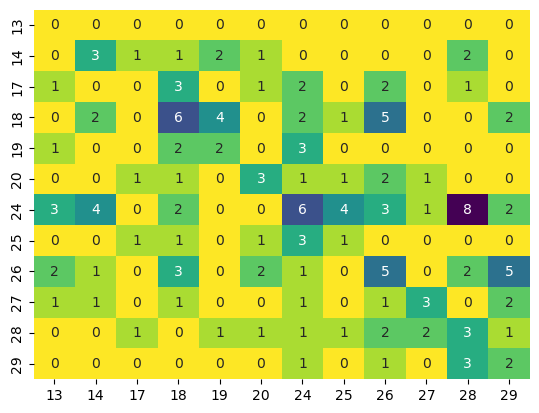

In [91]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [92]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

          13       0.00      0.00      0.00         8
          14       0.30      0.27      0.29        11
          17       0.00      0.00      0.00         4
          18       0.27      0.30      0.29        20
          19       0.25      0.22      0.24         9
          20       0.30      0.33      0.32         9
          24       0.18      0.29      0.22        21
          25       0.14      0.12      0.13         8
          26       0.24      0.24      0.24        21
          27       0.30      0.43      0.35         7
          28       0.23      0.16      0.19        19
          29       0.29      0.14      0.19        14

    accuracy                           0.23       151
   macro avg       0.21      0.21      0.20       151
weighted avg       0.23      0.23      0.22       151



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [93]:
from sklearn import metrics
# Print the confusion matrix

metrics.confusion_matrix(Y_test, X_testing_prediction)

array([[0, 0, 1, 0, 1, 0, 3, 0, 2, 1, 0, 0],
       [0, 3, 0, 2, 0, 0, 4, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 3, 6, 2, 1, 2, 1, 3, 1, 0, 0],
       [0, 2, 0, 4, 2, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 3, 0, 1, 2, 0, 1, 0],
       [0, 0, 2, 2, 3, 1, 6, 3, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 4, 1, 0, 0, 1, 0],
       [0, 0, 2, 5, 0, 2, 3, 0, 5, 1, 2, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 2, 0],
       [0, 2, 1, 0, 0, 0, 8, 0, 2, 0, 3, 3],
       [0, 0, 0, 2, 0, 0, 2, 0, 5, 2, 1, 2]])

In [94]:
n

NameError: name 'n' is not defined

# Now i want to make second model.In this model i Will take afftype as a target attribute and predict whether a person is suffering from bipolar II,unipolar depressive,bipolar I

In [95]:
md=kk.copy()

In [96]:
md=md.drop(['madrs2'],axis=1)

In [97]:
md

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1
0,2,3,1,2,2,2,2,24
1,2,6,2,2,2,1,2,14
2,2,2,2,2,2,2,2,14
3,2,4,2,2,2,2,2,24
4,2,6,2,2,1,2,2,29
...,...,...,...,...,...,...,...,...
599,2,2,2,2,1,1,1,14
600,1,3,1,2,1,2,2,29
601,2,4,1,2,2,1,2,28
602,1,3,1,2,2,2,2,28


In [98]:
X=md.drop('afftype',axis=1)
Y=md['afftype']

In [99]:
X.shape,Y.shape

((604, 7), (604,))

In [100]:
import imblearn


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/utils/metaestimators.py)

In [106]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [107]:
X_resampled.shape, y_resampled.shape

((1233, 7), (1233,))

In [108]:
y_resampled.value_counts()

afftype
1    411
2    411
3    411
Name: count, dtype: int64

In [109]:
X,Y=X_resampled,y_resampled

In [110]:
X.shape,Y.shape

((1233, 7), (1233,))

In [111]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [112]:
Xs

array([[1.    , 0.375 , 1.    , ..., 1.    , 1.    , 0.6875],
       [1.    , 0.75  , 1.    , ..., 0.    , 1.    , 0.0625],
       [1.    , 0.25  , 1.    , ..., 1.    , 1.    , 0.0625],
       ...,
       [1.    , 0.375 , 1.    , ..., 1.    , 1.    , 0.75  ],
       [1.    , 0.375 , 1.    , ..., 1.    , 1.    , 0.8125],
       [1.    , 0.25  , 1.    , ..., 1.    , 1.    , 0.3125]])

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [115]:
Xs

array([[ 0.79025688, -0.30886847,  0.23781352, ...,  0.78485   ,
         0.30983867,  0.34975137],
       [ 0.79025688,  1.17683306,  0.23781352, ..., -1.27412882,
         0.30983867, -1.7096729 ],
       [ 0.79025688, -0.80410231,  0.23781352, ...,  0.78485   ,
         0.30983867, -1.7096729 ],
       ...,
       [ 0.79025688, -0.30886847,  0.23781352, ...,  0.78485   ,
         0.30983867,  0.5556938 ],
       [ 0.79025688, -0.30886847,  0.23781352, ...,  0.78485   ,
         0.30983867,  0.76163623],
       [ 0.79025688, -0.80410231,  0.23781352, ...,  0.78485   ,
         0.30983867, -0.88590319]])

In [116]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.2144,stratify=Y,random_state=42)

In [117]:
X.shape,X_train.shape,X_test.shape




((1233, 7), (968, 7), (265, 7))

In [118]:
Y.shape,Y_train.shape,Y_test.shape

((1233,), (968,), (265,))

In [119]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.5114
Logistic Regression:
trainAccuracy: 0.5165
Naive Bayes:
trainAccuracy: 0.5021
Support Vector Machine:
trainAccuracy: 0.6260
K-Nearest Neighbors:
trainAccuracy: 0.7335
Decision Tree:
trainAccuracy: 0.8285
Random Forest:
trainAccuracy: 0.8275
Bagging:
trainAccuracy: 0.8202
AdaBoost:
trainAccuracy: 0.5878


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 0.7572
Extra Trees:
trainAccuracy: 0.8285
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.5170
Logistic Regression:
testingAccuracy: 0.5057
Naive Bayes:
testingAccuracy: 0.5245
Support Vector Machine:
testingAccuracy: 0.5547
K-Nearest Neighbors:
testingAccuracy: 0.5887
Decision Tree:
testingAccuracy: 0.7132
Random Forest:
testingAccuracy: 0.7208
Bagging:
testingAccuracy: 0.6906
AdaBoost:
testingAccuracy: 0.5774
Gradient Boosting:
testingAccuracy: 0.6528
Extra Trees:
testingAccuracy: 0.6755


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [120]:
#Decision Tree is good in terms of both training and testing score
modelkk=DecisionTreeClassifier()

In [121]:
modelkk.fit(X_train,Y_train)

DecisionTreeClassifier()

In [122]:
X_train_prediction=modelkk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [123]:
training_accuracy

0.8285123966942148

In [124]:
X_testing_prediction=modelkk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [125]:
testing_accuracy

0.7132075471698113

<Axes: >

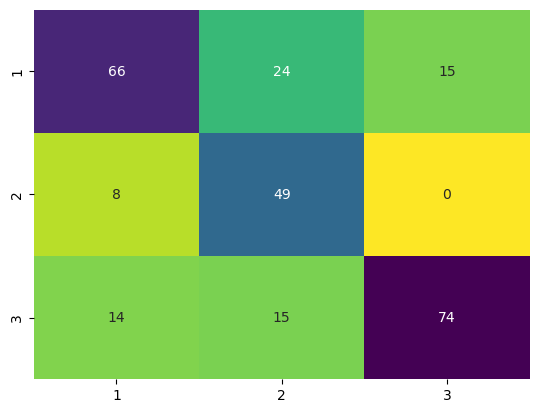

In [126]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelkk.classes_, xticklabels=modelkk.classes_)

In [127]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           1       0.63      0.75      0.68        88
           2       0.86      0.56      0.68        88
           3       0.72      0.83      0.77        89

    accuracy                           0.71       265
   macro avg       0.74      0.71      0.71       265
weighted avg       0.74      0.71      0.71       265



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/318039330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/318039330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Decision Tree ')

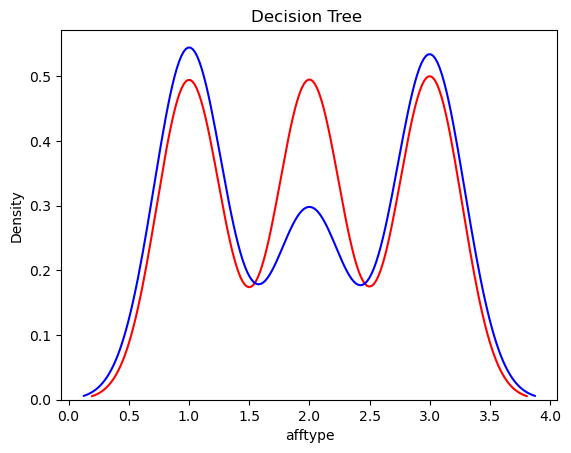

In [128]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree ')

In [129]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.loc[296]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelkk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction==1):
    print("The Person is suffering from the depression type : bipolar II")
elif(prediction==2):
    print("The Person is suffering from the depression type :unipolar depressive")
elif(prediction==3):
    print("The Person is suffering from the depression type :bipolar I")

[[0.     0.875  1.     1.     1.     1.     0.6875]]
[[-1.26541133  1.6720669   0.23781352  0.47630418  0.78485     0.30983867
   0.34975137]]
target: [1]
The Person is suffering from the depression type : bipolar II


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [130]:
X.tail(40)

,gender,age,melanch,inpatient,marriage,work,madrs1
1193,2,0,2,2,1,2,18
1194,2,0,2,2,1,2,18
1195,1,8,2,1,2,2,29
1196,2,2,2,2,1,2,18
1197,2,6,2,2,2,2,14
1198,1,4,2,2,2,2,13
1199,2,7,2,2,2,2,28
1200,2,3,2,2,2,2,18
1201,2,0,2,2,2,1,20
1202,2,1,2,1,2,2,29


In [131]:
Y.head(300)

0      1
1      2
2      2
3      2
4      2
      ..
295    1
296    2
297    2
298    1
299    3
Name: afftype, Length: 300, dtype: category
Categories (3, int64): [1, 2, 3]

# Now i want to make third model.In this model i Will check whether the medical(depression) condition will improved or not after treatment.for this i will subtract madrs2-madrs1 and store in new columns name as target. except this columns all acts as features for training the model

In [132]:
jp=kk.copy()

In [133]:
jp

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,3,1,2,2,2,2,24,25
1,2,6,2,2,2,1,2,14,18
2,2,2,2,2,2,2,2,14,18
3,2,4,2,2,2,2,2,24,25
4,2,6,2,2,1,2,2,29,18
...,...,...,...,...,...,...,...,...,...
599,2,2,2,2,1,1,1,14,18
600,1,3,1,2,1,2,2,29,21
601,2,4,1,2,2,1,2,28,11
602,1,3,1,2,2,2,2,28,11


In [134]:
jp['madrs1']=jp['madrs1'].astype('category').astype('int')

In [135]:
jp['madrs2']=jp['madrs2'].astype('category').astype('int')

In [136]:
jp['result']=jp['madrs2'] - jp['madrs1']

In [137]:
jp.head(40)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,result
0,2,3,1,2,2,2,2,24,25,1
1,2,6,2,2,2,1,2,14,18,4
2,2,2,2,2,2,2,2,14,18,4
3,2,4,2,2,2,2,2,24,25,1
4,2,6,2,2,1,2,2,29,18,-11
5,1,8,2,2,1,2,2,29,16,-13
6,2,3,1,2,2,2,2,24,11,-13
7,2,4,2,2,2,1,2,24,24,0
8,2,4,2,2,2,1,2,28,24,-4
9,1,4,2,2,2,2,2,24,24,0


In [138]:
jp['madrs2']=jp['madrs2'].astype('int').astype('category')

In [139]:
jp['madrs1']=jp['madrs1'].astype('int').astype('category')

In [140]:
jp['result']=jp['result'].astype('int').astype('category')

In [141]:
jp

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2,result
0,2,3,1,2,2,2,2,24,25,1
1,2,6,2,2,2,1,2,14,18,4
2,2,2,2,2,2,2,2,14,18,4
3,2,4,2,2,2,2,2,24,25,1
4,2,6,2,2,1,2,2,29,18,-11
...,...,...,...,...,...,...,...,...,...,...
599,2,2,2,2,1,1,1,14,18,4
600,1,3,1,2,1,2,2,29,21,-8
601,2,4,1,2,2,1,2,28,11,-17
602,1,3,1,2,2,2,2,28,11,-17


In [142]:
X=jp.drop(['result'],axis=1)

In [143]:
Y=jp['result']

In [144]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [145]:
Xs

array([[1.        , 0.375     , 0.        , ..., 1.        , 0.6875    ,
        0.82352941],
       [1.        , 0.75      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       [1.        , 0.25      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       ...,
       [1.        , 0.5       , 0.        , ..., 1.        , 0.9375    ,
        0.        ],
       [0.        , 0.375     , 0.        , ..., 1.        , 0.9375    ,
        0.        ],
       [1.        , 0.125     , 0.5       , ..., 1.        , 0.875     ,
        0.82352941]])

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [148]:
Xs

array([[ 0.92962225, -0.30357708, -1.5101985 , ...,  0.38791261,
         0.27102735,  1.12710166],
       [ 0.92962225,  1.11051461,  0.38618382, ...,  0.38791261,
        -1.72046317, -0.37664899],
       [ 0.92962225, -0.77494097,  0.38618382, ...,  0.38791261,
        -1.72046317, -0.37664899],
       ...,
       [ 0.92962225,  0.16778682, -1.5101985 , ...,  0.38791261,
         1.06762356, -1.88039964],
       [-1.07570575, -0.30357708, -1.5101985 , ...,  0.38791261,
         1.06762356, -1.88039964],
       [ 0.92962225, -1.24630487,  0.38618382, ...,  0.38791261,
         0.86847451,  1.12710166]])

In [149]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.219,random_state=101)

In [150]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.2633
Logistic Regression:
trainAccuracy: 0.4777
Naive Bayes:
trainAccuracy: 0.1210
Support Vector Machine:
trainAccuracy: 0.4926
K-Nearest Neighbors:
trainAccuracy: 0.4246
Decision Tree:
trainAccuracy: 1.0000
Random Forest:
trainAccuracy: 1.0000
Bagging:
trainAccuracy: 0.9915
AdaBoost:
trainAccuracy: 0.1826


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 1.0000
Extra Trees:
trainAccuracy: 1.0000
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.1353
Logistic Regression:
testingAccuracy: 0.2556
Naive Bayes:
testingAccuracy: 0.0526
Support Vector Machine:
testingAccuracy: 0.2331
K-Nearest Neighbors:
testingAccuracy: 0.1128
Decision Tree:
testingAccuracy: 0.8496
Random Forest:
testingAccuracy: 0.5940
Bagging:
testingAccuracy: 0.8421
AdaBoost:
testingAccuracy: 0.1429


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
testingAccuracy: 0.7895
Extra Trees:
testingAccuracy: 0.3684


# Here Decision Tree is good in terms of training and testing accuracy

In [151]:
#Decision Tree is good in terms of both training and testing score
models=DecisionTreeClassifier()

In [152]:
models.fit(X_train,Y_train)

DecisionTreeClassifier()

In [153]:
X_train_prediction=models.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [154]:
training_accuracy

1.0

In [155]:
X_testing_prediction=models.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [156]:
testing_accuracy

0.8721804511278195

<Axes: >

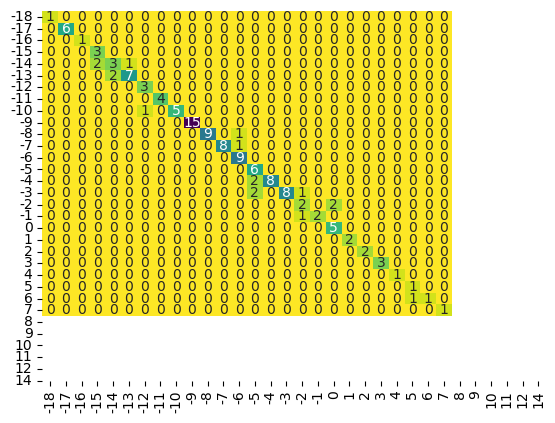

In [157]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [158]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

         -14       1.00      1.00      1.00         1
         -13       1.00      1.00      1.00         6
         -12       1.00      1.00      1.00         1
         -11       1.00      0.60      0.75         5
         -10       0.50      0.60      0.55         5
          -9       0.78      0.88      0.82         8
          -8       1.00      0.75      0.86         4
          -7       1.00      1.00      1.00         4
          -6       0.83      1.00      0.91         5
          -5       1.00      1.00      1.00        15
          -4       0.90      1.00      0.95         9
          -3       0.89      1.00      0.94         8
          -2       1.00      0.82      0.90        11
          -1       1.00      0.60      0.75        10
           0       0.80      1.00      0.89         8
           1       0.73      1.00      0.84         8
           2       0.50      0.50      0.50         4
           3       0.67    

/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/726444085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/726444085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Random Forest ')

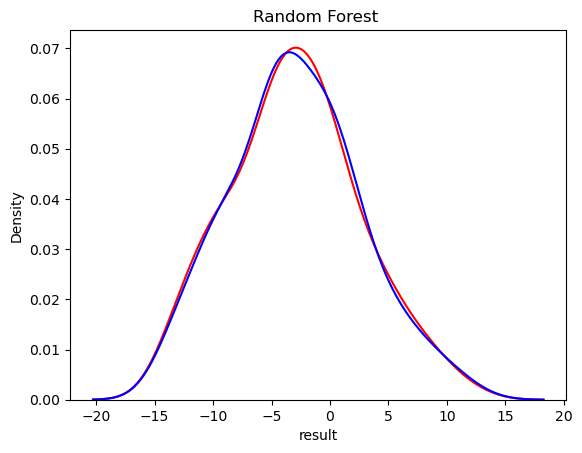

In [159]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

In [160]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[399]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=model.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction <0):
    print("Patient Medical(depression) Condition has been improved after treatment ")
elif(prediction>0):
    print("Patient Medical(depression) Condition  become drastic  after treatment   ")
elif(prediction==0):
    print("Patient medical(depression) condition is neither be improved nor become drastic")

[[0.         0.125      0.5        1.         1.         0.
  1.         0.3125     0.82352941]]
[[-1.07570575 -1.24630487  0.38618382  0.27337355  0.56715344 -1.03711204
   0.38791261 -0.92386696  1.12710166]]
target: [7]
Patient Medical(depression) Condition  become drastic  after treatment   


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [161]:
X.head(15)

,gender,age,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
0,2,3,1,2,2,2,2,24,25
1,2,6,2,2,2,1,2,14,18
2,2,2,2,2,2,2,2,14,18
3,2,4,2,2,2,2,2,24,25
4,2,6,2,2,1,2,2,29,18
5,1,8,2,2,1,2,2,29,16
6,2,3,1,2,2,2,2,24,11
7,2,4,2,2,2,1,2,24,24
8,2,4,2,2,2,1,2,28,24
9,1,4,2,2,2,2,2,24,24


In [162]:
Y.head(400)

0       1
1       4
2       4
3       1
4     -11
       ..
395    -2
396    -6
397    -3
398    -9
399     7
Name: result, Length: 400, dtype: category
Categories (32, int64): [-18, -17, -16, -15, ..., 10, 11, 12, 14]

# Now i want too design fourth machine learning model in which i will take melanch as target attributes and rest of the columns as features for training the machine learning model.

In [163]:
jp=jp.drop('result',axis=1)

In [164]:
jp.shape

(604, 9)

In [165]:
jp.groupby('melanch').size()

melanch
1     42
2    562
dtype: int64

In [166]:
X=jp.drop('melanch',axis=1)
Y=jp['melanch']

In [167]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [168]:
X_resampled.shape, y_resampled.shape

((1124, 8), (1124,))

In [169]:
X,Y=X_resampled,y_resampled

In [170]:
X.shape,Y.shape

((1124, 8), (1124,))

In [171]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [172]:
Xs

array([[1.        , 0.375     , 0.        , ..., 1.        , 0.6875    ,
        0.82352941],
       [1.        , 0.75      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       [1.        , 0.25      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       ...,
       [0.        , 0.125     , 0.5       , ..., 0.        , 0.4375    ,
        0.82352941],
       [1.        , 0.75      , 0.5       , ..., 0.        , 0.875     ,
        0.41176471],
       [0.        , 0.125     , 0.5       , ..., 1.        , 0.875     ,
        0.82352941]])

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [175]:
Xs

array([[ 1.16889511, -0.1099312 , -1.80025215, ...,  0.34410458,
         0.14372839,  0.95308785],
       [ 1.16889511,  1.22829269,  0.3163623 , ...,  0.34410458,
        -1.8581391 , -0.49485484],
       [ 1.16889511, -0.55600584,  0.3163623 , ...,  0.34410458,
        -1.8581391 , -0.49485484],
       ...,
       [-0.85550875, -1.00208047,  0.3163623 , ..., -2.90609328,
        -0.65701861,  0.95308785],
       [ 1.16889511,  1.22829269,  0.3163623 , ..., -2.90609328,
         0.74428863, -0.49485484],
       [-0.85550875, -1.00208047,  0.3163623 , ...,  0.34410458,
         0.74428863,  0.95308785]])

In [176]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.27,random_state=72)

In [177]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.7732
Logistic Regression:
trainAccuracy: 0.7573
Naive Bayes:
trainAccuracy: 0.7110
Support Vector Machine:
trainAccuracy: 0.8915
K-Nearest Neighbors:
trainAccuracy: 0.9220
Decision Tree:
trainAccuracy: 0.9939
Random Forest:
trainAccuracy: 0.9939
Bagging:
trainAccuracy: 0.9902
AdaBoost:
trainAccuracy: 0.8805
Gradient Boosting:
trainAccuracy: 0.9683
Extra Trees:
trainAccuracy: 0.9939
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.7862
Logistic Regression:
testingAccuracy: 0.7730
Naive Bayes:
testingAccuracy: 0.7171
Support Vector Machine:
testingAccuracy: 0.9211
K-Nearest Neighbors:
testingAccuracy: 0.8980
Decision Tree:
testingAccuracy: 0.9572
Random Forest:
testingAccuracy: 0.9704
Bagging:
testingAccuracy: 0.9605
AdaBoost:
testingAccuracy: 0.8750
Gradient Boosting:
testingAccuracy: 0.9671
Extra Trees:
testingAccuracy: 0.9572


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# I will take Random forest for model training

In [178]:
modelss= RandomForestClassifier()

In [179]:
modelss.fit(X_train,Y_train)

RandomForestClassifier()

In [180]:
X_train_prediction=modelss.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [181]:
training_accuracy

0.9939024390243902

In [182]:
X_testing_prediction=modelss.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [183]:
testing_accuracy

0.9769736842105263

<Axes: >

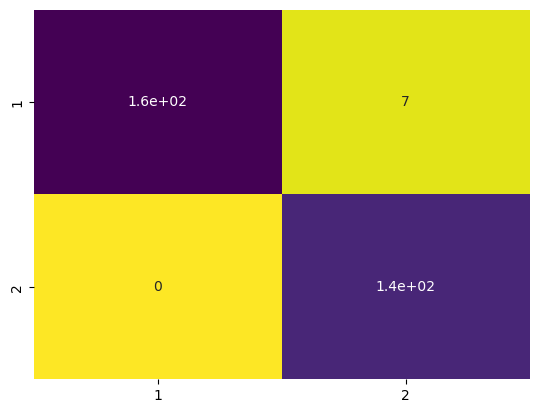

In [184]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelss.classes_, xticklabels=modelss.classes_)

In [185]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       157
           2       1.00      0.95      0.98       147

    accuracy                           0.98       304
   macro avg       0.98      0.98      0.98       304
weighted avg       0.98      0.98      0.98       304



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/726444085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/726444085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Random Forest ')

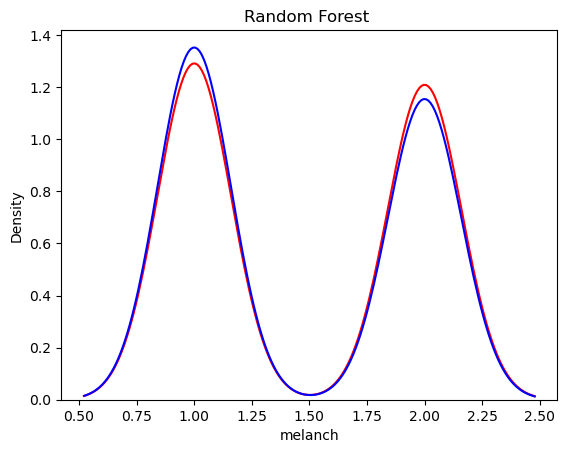

In [186]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest ')

In [187]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[95]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelss.predict(std_data)#model=Random Forest Tree
print("target:",prediction)
if(prediction ==1):
    print("person is suffering from melancholia ")
elif(prediction==2):
    print("person is not suffering from melancholia  ")

[[0.  1.  0.5 1.  1.  1.  1.  1. ]]
[[-0.85550875  2.12044196  0.3163623   0.82774236  1.14783526  0.34410458
   1.14466213  1.57363471]]
target: [2]
person is not suffering from melancholia  


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [188]:
X.head(15)

,gender,age,afftype,inpatient,marriage,work,madrs1,madrs2
0,2,3,1,2,2,2,24,25
1,2,6,2,2,1,2,14,18
2,2,2,2,2,2,2,14,18
3,2,4,2,2,2,2,24,25
4,2,6,2,1,2,2,29,18
5,1,8,2,1,2,2,29,16
6,2,3,1,2,2,2,24,11
7,2,4,2,2,1,2,24,24
8,2,4,2,2,1,2,28,24
9,1,4,2,2,2,2,24,24


In [189]:
Y.head(100)

0     2
1     2
2     2
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    2
Name: melanch, Length: 100, dtype: category
Categories (2, int64): [1, 2]

# Now i want to design 5th machine learning model.in this model i will take work as target attributes and other features as trainingattributes for machine learning model

In [190]:
jp.groupby('work').size()

work
1     79
2    525
dtype: int64

In [191]:
jp.groupby('work').count()

,gender,age,afftype,melanch,inpatient,marriage,madrs1,madrs2
work,,,,,,,,
1,79,79,79,79,79,79,79,79
2,525,525,525,525,525,525,525,525


In [192]:
X=jp.drop('work',axis=1)
Y=jp['work']

In [193]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [194]:
X_resampled.shape, y_resampled.shape

((1050, 8), (1050,))

In [195]:
X,Y=X_resampled,y_resampled

In [196]:
X.shape,Y.shape

((1050, 8), (1050,))

In [197]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [198]:
Xs

array([[1.        , 0.375     , 0.        , ..., 1.        , 0.6875    ,
        0.82352941],
       [1.        , 0.75      , 0.5       , ..., 0.        , 0.0625    ,
        0.41176471],
       [1.        , 0.25      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       ...,
       [1.        , 0.625     , 0.5       , ..., 1.        , 0.4375    ,
        0.29411765],
       [1.        , 0.375     , 0.5       , ..., 1.        , 0.6875    ,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 0.        , 0.9375    ,
        0.29411765]])

In [199]:
Std=StandardScaler()
Xs=Std.fit_transform(Xs)


In [200]:
Xs

array([[ 0.76713902, -0.31207067, -1.72766308, ...,  1.13471657,
         0.41032027,  1.22624424],
       [ 0.76713902,  0.97460815,  0.38660992, ..., -0.88127734,
        -1.59263779, -0.31653138],
       [ 0.76713902, -0.74096362,  0.38660992, ...,  1.13471657,
        -1.59263779, -0.31653138],
       ...,
       [ 0.76713902,  0.54571521,  0.38660992, ...,  1.13471657,
        -0.39086296, -0.75732441],
       [ 0.76713902, -0.31207067,  0.38660992, ...,  1.13471657,
         0.41032027, -1.85930699],
       [ 0.76713902, -1.5987495 ,  0.38660992, ..., -0.88127734,
         1.21150349, -0.75732441]])

In [201]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.26,random_state=72)

In [202]:
X.shape,X_train.shape,X_test.shape

((1050, 8), (777, 8), (273, 8))

In [203]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.6680
Logistic Regression:
trainAccuracy: 0.6718
Naive Bayes:
trainAccuracy: 0.7117
Support Vector Machine:
trainAccuracy: 0.8327
K-Nearest Neighbors:
trainAccuracy: 0.8700
Decision Tree:
trainAccuracy: 0.9846
Random Forest:
trainAccuracy: 0.9846
Bagging:
trainAccuracy: 0.9755
AdaBoost:
trainAccuracy: 0.8378
Gradient Boosting:
trainAccuracy: 0.9305
Extra Trees:
trainAccuracy: 0.9846
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.6374
Logistic Regression:
testingAccuracy: 0.6520
Naive Bayes:
testingAccuracy: 0.6923
Support Vector Machine:
testingAccuracy: 0.7875
K-Nearest Neighbors:
testingAccuracy: 0.8022
Decision Tree:
testingAccuracy: 0.9121


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest:
testingAccuracy: 0.9267
Bagging:
testingAccuracy: 0.9121
AdaBoost:
testingAccuracy: 0.8315
Gradient Boosting:
testingAccuracy: 0.8864
Extra Trees:
testingAccuracy: 0.9414


# I will take Decsion Tree  for model training

In [204]:
modelpk= DecisionTreeClassifier()

In [205]:
modelpk.fit(X_train,Y_train)

DecisionTreeClassifier()

In [206]:
X_train_prediction=modelpk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [207]:
training_accuracy

0.9845559845559846

In [208]:
X_testing_prediction=modelpk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [209]:
testing_accuracy

0.9084249084249084

<Axes: >

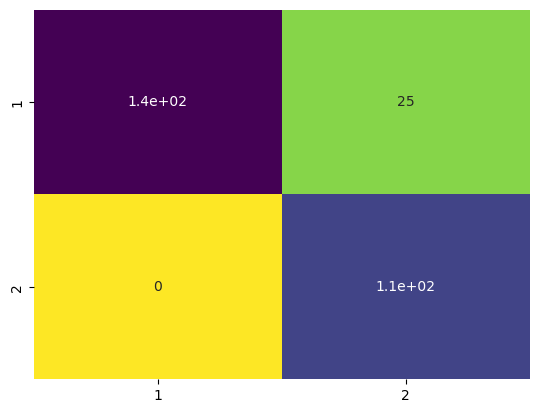

In [210]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelpk.classes_, xticklabels=modelpk.classes_)

In [211]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92       138
           2       1.00      0.81      0.90       135

    accuracy                           0.91       273
   macro avg       0.92      0.91      0.91       273
weighted avg       0.92      0.91      0.91       273



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/318039330.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/318039330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Decision Tree ')

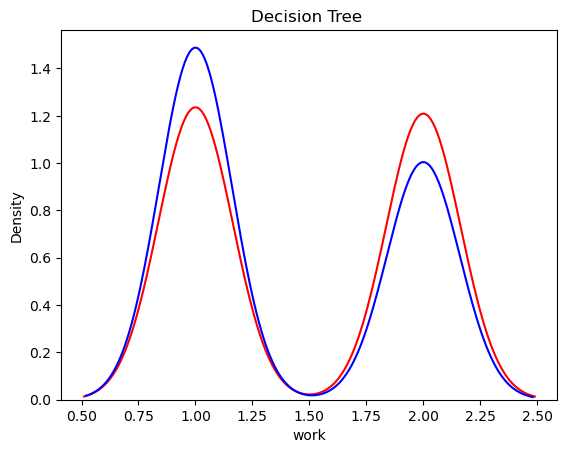

In [212]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision Tree ')

In [213]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[14]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelpk.predict(std_data)#model=Random Forest Tree
print("target:",prediction)
if(prediction ==1):
    print("working or studying ")
elif(prediction==2):
    print("unemployed/sick leave/pension)  ")

[[1.         0.75       0.5        1.         0.         1.
  0.8125     0.41176471]]
[[ 0.76713902  0.97460815  0.38660992  0.26107221 -1.99406703  1.13471657
   0.81091188 -0.31653138]]
target: [1]
working or studying 


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [214]:
X.head(15)

,gender,age,afftype,melanch,inpatient,marriage,madrs1,madrs2
0,2,3,1,2,2,2,24,25
1,2,6,2,2,2,1,14,18
2,2,2,2,2,2,2,14,18
3,2,4,2,2,2,2,24,25
4,2,6,2,2,1,2,29,18
5,1,8,2,2,1,2,29,16
6,2,3,1,2,2,2,24,11
7,2,4,2,2,2,1,24,24
8,2,4,2,2,2,1,28,24
9,1,4,2,2,2,2,24,24


In [215]:
Y.head(15)

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
Name: work, dtype: category
Categories (2, int64): [1, 2]

# Now i want to design sixth machine learning model.in this model i will take marriage as target attributes and rest as training attributes for machine learning model

In [216]:
 jp.groupby('marriage').size()

marriage
1    291
2    313
dtype: int64

In [217]:
X=jp.drop('marriage',axis=1)
Y=jp['marriage']

In [218]:
# # import library
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)

# # Fit and transform your dataset
# X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [219]:
# X,Y=X_resampled,y_resampled

In [220]:
X.shape,Y.shape

((604, 8), (604,))

In [221]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [222]:
Xs

array([[1.        , 0.375     , 0.        , ..., 1.        , 0.6875    ,
        0.82352941],
       [1.        , 0.75      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       [1.        , 0.25      , 0.5       , ..., 1.        , 0.0625    ,
        0.41176471],
       ...,
       [1.        , 0.5       , 0.        , ..., 1.        , 0.9375    ,
        0.        ],
       [0.        , 0.375     , 0.        , ..., 1.        , 0.9375    ,
        0.        ],
       [1.        , 0.125     , 0.5       , ..., 1.        , 0.875     ,
        0.82352941]])

In [233]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [234]:
Xs

array([[ 0.92962225, -0.30357708, -1.5101985 , ...,  0.38791261,
         0.27102735,  1.12710166],
       [ 0.92962225,  1.11051461,  0.38618382, ...,  0.38791261,
        -1.72046317, -0.37664899],
       [ 0.92962225, -0.77494097,  0.38618382, ...,  0.38791261,
        -1.72046317, -0.37664899],
       ...,
       [ 0.92962225,  0.16778682, -1.5101985 , ...,  0.38791261,
         1.06762356, -1.88039964],
       [-1.07570575, -0.30357708, -1.5101985 , ...,  0.38791261,
         1.06762356, -1.88039964],
       [ 0.92962225, -1.24630487,  0.38618382, ...,  0.38791261,
         0.86847451,  1.12710166]])

In [301]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.28,random_state=42,stratify=Y)

In [302]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.6290
Logistic Regression:
trainAccuracy: 0.6290
Naive Bayes:
trainAccuracy: 0.6221
Support Vector Machine:
trainAccuracy: 0.7143
K-Nearest Neighbors:
trainAccuracy: 0.7212
Decision Tree:
trainAccuracy: 0.9378
Random Forest:
trainAccuracy: 0.9378
Bagging:
trainAccuracy: 0.9032
AdaBoost:
trainAccuracy: 0.6912
Gradient Boosting:
trainAccuracy: 0.8018
Extra Trees:
trainAccuracy: 0.9378
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.6118
Logistic Regression:
testingAccuracy: 0.6118
Naive Bayes:
testingAccuracy: 0.6471
Support Vector Machine:
testingAccuracy: 0.5765
K-Nearest Neighbors:
testingAccuracy: 0.5588
Decision Tree:
testingAccuracy: 0.5353
Random Forest:
testingAccuracy: 0.5529
Bagging:
testingAccuracy: 0.5353
AdaBoost:
testingAccuracy: 0.6294
Gradient Boosting:
testingAccuracy: 0.6294
Extra Trees:
testingAccuracy: 0.5118


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [303]:
modelsk= DecisionTreeClassifier()


In [304]:
modelsk.fit(X_train,Y_train)

DecisionTreeClassifier()

In [305]:
X_train_prediction=modelsk.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [306]:
training_accuracy

0.9377880184331797

In [307]:
X_testing_prediction=modelsk.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [308]:
testing_accuracy


0.5117647058823529

<Axes: >

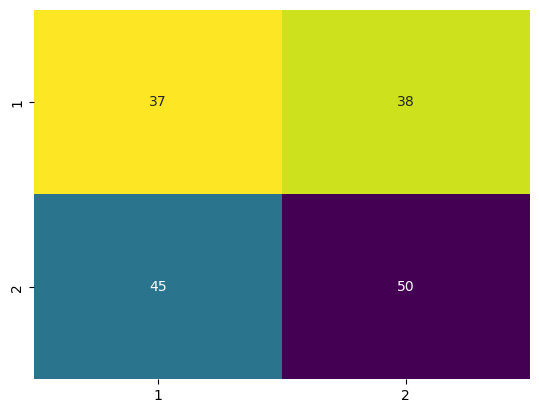

In [309]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelsk.classes_, xticklabels=modelsk.classes_)

In [310]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           1       0.49      0.45      0.47        82
           2       0.53      0.57      0.55        88

    accuracy                           0.51       170
   macro avg       0.51      0.51      0.51       170
weighted avg       0.51      0.51      0.51       170



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/2711094293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/2711094293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

Text(0.5, 1.0, 'Decision TRee ')

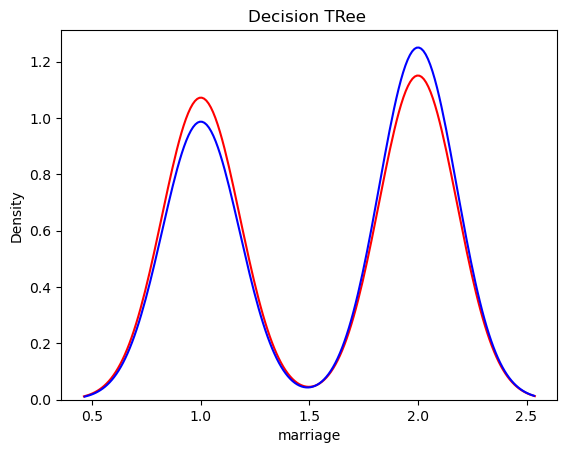

In [311]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision TRee ')

In [312]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[7]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelsk.predict(std_data)#model=Decision Tree
print("target:",prediction)
if(prediction ==1):
    print(" married or cohabiting ")
elif(prediction==2):
    print("Single  ")

[[1.         0.5        0.5        1.         1.         1.
  0.6875     0.76470588]]
[[0.92962225 0.16778682 0.38618382 0.27337355 0.56715344 0.38791261
  0.27102735 0.91228014]]
target: [1]
 married or cohabiting 


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [313]:
X,Y

(    gender age afftype melanch inpatient work madrs1 madrs2
 0        2   3       1       2         2    2     24     25
 1        2   6       2       2         2    2     14     18
 2        2   2       2       2         2    2     14     18
 3        2   4       2       2         2    2     24     25
 4        2   6       2       2         1    2     29     18
 ..     ...  ..     ...     ...       ...  ...    ...    ...
 599      2   2       2       2         1    1     14     18
 600      1   3       1       2         1    2     29     21
 601      2   4       1       2         2    2     28     11
 602      1   3       1       2         2    2     28     11
 603      2   1       2       1         1    2     27     25
 
 [604 rows x 8 columns],
 0      2
 1      1
 2      2
 3      2
 4      2
       ..
 599    1
 600    2
 601    1
 602    2
 603    2
 Name: marriage, Length: 604, dtype: category
 Categories (2, int64): [1, 2])

# Now i want to design seventh machine learning model.in this model i will take inpatient as target attributes and rest as training attributes for machine learning model

In [314]:
jp.groupby('inpatient').size()

inpatient
1    147
2    457
dtype: int64

In [315]:
jp.groupby('inpatient').count()

,gender,age,afftype,melanch,marriage,work,madrs1,madrs2
inpatient,,,,,,,,
1,147,147,147,147,147,147,147,147
2,457,457,457,457,457,457,457,457


In [317]:
X=jp.drop('inpatient',axis=1)
Y=jp['inpatient']

In [318]:
# import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [319]:
X_resampled.shape, y_resampled.shape

((914, 8), (914,))

In [320]:
X,Y=X_resampled,y_resampled

In [321]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [322]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)

In [323]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.28,random_state=42,stratify=Y)

In [324]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    trainacc = accuracy_score( X_train_prediction, Y_train)
    print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
#for testing  data
print("TESTING ACCURACY:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    testacc = accuracy_score(y_pred, Y_test)
    print(f'{name}:\ntestingAccuracy: {testacc:.4f}')

TRAINING ACCURACY:
Linear Discriminant Analysis:
trainAccuracy: 0.6520
Logistic Regression:
trainAccuracy: 0.6596
Naive Bayes:
trainAccuracy: 0.6672
Support Vector Machine:
trainAccuracy: 0.7629
K-Nearest Neighbors:
trainAccuracy: 0.8085
Decision Tree:
trainAccuracy: 0.9574
Random Forest:
trainAccuracy: 0.9574
Bagging:
trainAccuracy: 0.9483
AdaBoost:
trainAccuracy: 0.7401
Gradient Boosting:
trainAccuracy: 0.8647
Extra Trees:
trainAccuracy: 0.9574
TESTING ACCURACY:
Linear Discriminant Analysis:
testingAccuracy: 0.6914
Logistic Regression:
testingAccuracy: 0.6992
Naive Bayes:
testingAccuracy: 0.6680
Support Vector Machine:
testingAccuracy: 0.7266
K-Nearest Neighbors:
testingAccuracy: 0.7578
Decision Tree:
testingAccuracy: 0.8945
Random Forest:
testingAccuracy: 0.9062
Bagging:
testingAccuracy: 0.8828
AdaBoost:
testingAccuracy: 0.7734
Gradient Boosting:
testingAccuracy: 0.8438
Extra Trees:
testingAccuracy: 0.8594


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [325]:
modelak= DecisionTreeClassifier()

In [326]:
modelak.fit(X_train,Y_train)

DecisionTreeClassifier()

In [327]:
X_train_prediction=modelak.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [328]:

training_accuracy

0.9574468085106383

In [329]:
X_testing_prediction=modelak.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [330]:
testing_accuracy

0.890625

<Axes: >

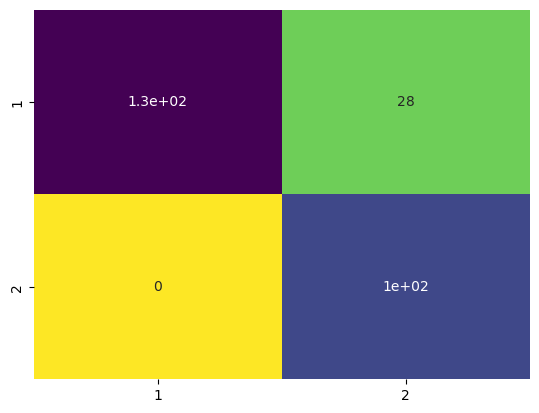

In [331]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=modelak.classes_, xticklabels=modelak.classes_)

In [332]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90       128
           2       1.00      0.78      0.88       128

    accuracy                           0.89       256
   macro avg       0.91      0.89      0.89       256
weighted avg       0.91      0.89      0.89       256



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/2711094293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_79455/2711094293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

Text(0.5, 1.0, 'Decision TRee ')

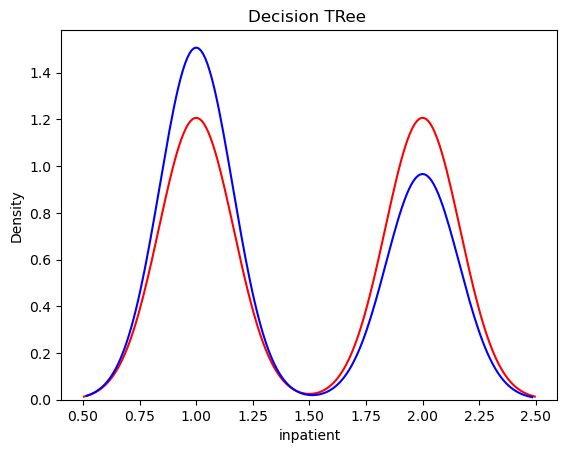

In [333]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Decision TRee ')

In [334]:
# making a predictive System for testing the data
# making a predictive System
input_data=X.iloc[19]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
std_data=Std.transform(std_data)
print(std_data)
prediction=modelak.predict(std_data)#model=Decision  Tree
print("target:",prediction)
if(prediction ==1):
    print(" Inpatient ")
elif(prediction==2):
    print("Outpatient  ")

[[0.         0.25       0.5        1.         0.         1.
  0.6875     0.47058824]]
[[-1.04247685 -0.69537928  0.32484032  0.33656573 -1.10139687  0.35442314
   0.17317512 -0.24917954]]
target: [2]
Outpatient  


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [337]:
Y.head(20)

0     2
1     2
2     2
3     2
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    1
14    1
15    2
16    2
17    2
18    2
19    2
Name: inpatient, dtype: category
Categories (2, int64): [1, 2]

In [338]:
X

,gender,age,afftype,melanch,marriage,work,madrs1,madrs2
0,2,3,1,2,2,2,24,25
1,2,6,2,2,1,2,14,18
2,2,2,2,2,2,2,14,18
3,2,4,2,2,2,2,24,25
4,2,6,2,2,2,2,29,18
...,...,...,...,...,...,...,...,...
909,2,4,2,2,1,2,26,24
910,1,1,2,2,1,2,27,21
911,1,8,2,1,2,2,29,28
912,2,1,2,2,1,2,28,23
